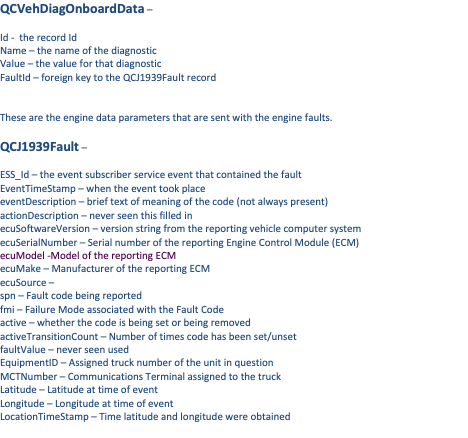

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

### Exploratory Data Analysis (EDA)

Dataset: QCJ1939Fault

In [15]:
j1939 = pd.read_csv('J1939Faults.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
j1939.head()

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp
0,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,111,17,True,2,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000
1,2,990360,2015-02-21 11:34:34.000,NaN,NaN,unknown,unknown,unknown,unknown,11,629,12,True,127,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000
2,3,990364,2015-02-21 11:35:31.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,False,127,NaN,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000
3,4,990370,2015-02-21 11:35:33.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,True,127,NaN,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000
4,5,990416,2015-02-21 11:39:41.000,NaN,NaN,22281684P01*22357957P01*22362082P01*,13063430,0USA13_13_0415_2238A,VOLVO,0,4364,17,False,2,NaN,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000


In [17]:
j1939.tail()

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp
1187330,1248454,123904424,2020-03-06 14:00:26.000,Low (Severity Low) Catalyst Tank Level,NaN,04384413*22383729*082218154102*60701732*G1*BGT*,80156139,6X1u17D1500000000,CMMNS,0,1761,17,False,3,NaN,2282,105439740,37.094768,-85.897407,2020-03-06 14:00:21.000
1187331,1248455,123905139,2020-03-06 14:04:23.000,Condition Exists Engine Protection Torque Derate,NaN,04358814*06099720*030816202706*09400153*G1*BDR*,79932020,6X1u13D1500000000,CMMNS,0,1569,31,True,5,NaN,1994,105354084,34.390740,-79.461805,2020-03-06 14:04:59.000
1187332,1248456,123905996,2020-03-06 14:13:38.000,Abnormal Rate of Change Aftertreatment 1 Intak...,NaN,05317106*05100987*050719120655*09401585*G1*BDR*,79880653,6X1u13D1500000000,CMMNS,0,3216,10,True,1,NaN,1850,105336308,34.430370,-84.920509,2020-03-06 14:14:14.000
1187333,1248457,123906113,2020-03-06 14:14:13.000,Low (Severity Medium) Engine Coolant Level,NaN,04384413*22544852*090619141107*60701756*G1*BGT*,NaN,NaN,NaN,0,111,18,True,8,NaN,2377,108605700,35.030925,-85.321527,2020-03-06 14:14:49.000
1187334,1248458,123906131,2020-03-06 14:15:34.000,Low (Severity Medium) Engine Coolant Level,NaN,04384413*22544852*090619141107*60701756*G1*BGT*,NaN,NaN,NaN,0,111,18,False,8,NaN,2377,108605700,35.027314,-85.323472,2020-03-06 14:15:30.000


In [18]:
j1939.shape

(1187335, 20)

In [0]:
#drop unused columns
j1939 = j1939.drop(['actionDescription','faultValue','ecuSource','ecuSoftwareVersion',
                    'ecuSerialNumber','LocationTimeStamp'], axis=1)

In [20]:
j1939.shape

(1187335, 14)

In [21]:
j1939.dtypes

RecordID                   int64
ESS_Id                     int64
EventTimeStamp            object
eventDescription          object
ecuModel                  object
ecuMake                   object
spn                        int64
fmi                        int64
active                      bool
activeTransitionCount      int64
EquipmentID               object
MCTNumber                  int64
Latitude                 float64
Longitude                float64
dtype: object

In [22]:
duplicate_rows_df = j1939[j1939.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (0, 14)


In [23]:
j1939.count()

RecordID                 1187335
ESS_Id                   1187335
EventTimeStamp           1187335
eventDescription         1126490
ecuModel                 1122577
ecuMake                  1122577
spn                      1187335
fmi                      1187335
active                   1187335
activeTransitionCount    1187335
EquipmentID              1187335
MCTNumber                1187335
Latitude                 1187335
Longitude                1187335
dtype: int64

In [24]:
print(j1939.isna().sum())

RecordID                     0
ESS_Id                       0
EventTimeStamp               0
eventDescription         60845
ecuModel                 64758
ecuMake                  64758
spn                          0
fmi                          0
active                       0
activeTransitionCount        0
EquipmentID                  0
MCTNumber                    0
Latitude                     0
Longitude                    0
dtype: int64


In [25]:
j1939['MCTNumber'].nunique()

768

3 service locations to remove: 

193 Aldi Blvd, Mt Juliet, TN: 36.0666667, -86.4347222

137 Eady Road – Bell Buckle, TN: 35.5883333, -86.4438888

5754 Fish Hatchery Road – Russellville, TN: 36.1950, -83.174722

In [0]:
#create a Polygon using surrounding points found in Google Maps
from shapely.geometry import Point, Polygon
#Aldi Blvd polygon
aldi_coords = [(36.077043, -86.454413), 
               (36.076150, -86.409545), 
               (36.057174, -86.409760), 
               (36.056203, -86.456580)]
aldi_poly = Polygon(aldi_coords)
#Eady Rd polygon
eady_coords = [(35.592803, -86.451845),
               (35.592209, -86.434829),
               (35.582106, -86.450342),
               (35.582158, -86.435322)]
eady_poly = Polygon(eady_coords)
#Fish Hatchery Rd polygon
fish_coords = [(36.200329, -83.183176),
               (36.199896, -83.166332),
               (36.189818, -83.181696),
               (36.189956, -83.166740)]
fish_poly = Polygon(fish_coords)

In [33]:
# Create geometry column with long,lat as points
j1939['geometry'] = [Point(xy) for xy in zip(j1939['Longitude'], j1939['Latitude'])]
# Create "near service location" column for T/F if points are near service location


ERROR! Session/line number was not unique in database. History logging moved to new session 59


In [39]:
#testing `.within` and `.contains` for points 
# would like to make function to pass geometry and make new column
p1 = Point(-84.626851, 38.857638)
p1.within(aldi_poly)
aldi_poly.contains(p1)

POINT (-84.626851 38.857638)


Dataset: Service Fault Codes

In [0]:
faultcodes = pd.read_excel('ServiceFaultCodes.xlsx')

In [14]:
faultcodes.head()

,Published in CES 14602,Cummins Fault Code,Revision,PID,SID,MID,J1587 FMI,SPN,J1939 FMI,J2012 Pcode,Lamp Color,Lamp Device,Cummins Description,Algorithm Description
0,Y,111,167,Not Mapped,254,0,12,629,12,P0606,Red,Stop / Shutdown,Engine Control Module Critical Internal Failur...,Error internal to the ECM related to memory ha...
1,Y,112,167,Not Mapped,20,128,7,635,7,Not Mapped,Red,Stop / Shutdown,Engine Timing Actuator Driver Circuit - Mechan...,Mechanical failure in the engine timing actuat...
2,Y,113,167,Not Mapped,20,128,3,635,3,Not Mapped,Amber,Warning,Engine Timing Actuator Driver Circuit - Voltag...,High signal voltage detected at the engine tim...
3,Y,114,167,Not Mapped,20,128,4,635,4,Not Mapped,Amber,Warning,Engine Timing Actuator Driver Circuit - Voltag...,Low voltage detected at the engine timing actu...
4,Y,115,167,190,Not Mapped,Not Mapped,2,612,2,P0008,Red,Stop / Shutdown,Engine Magnetic Speed/Position Lost Both of Tw...,The ECM has detected that the primary and back...
